<a href="https://colab.research.google.com/github/ivin12/Naan-Mudhalvan/blob/main/ADS_PHASE4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
file_path = 'MSFT.csv'

df = pd.read_csv(file_path)

print(df.head())


         Date      Open      High       Low     Close  Adj Close      Volume
0  1986-03-13  0.088542  0.101563  0.088542  0.097222   0.062549  1031788800
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   0.064783   308160000
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   0.065899   133171200
3  1986-03-18  0.102431  0.103299  0.098958  0.099826   0.064224    67766400
4  1986-03-19  0.099826  0.100694  0.097222  0.098090   0.063107    47894400


In [ ]:
import pandas as pd

df['Date'] = pd.to_datetime(df['Date'])

df = df.sort_values(by='Date')


for i in range(1, 6):  # Create lags up to 5 days
    df[f'Close_Lag_{i}'] = df['Close'].shift(i)

# Calculate moving averages

df['SMA_10'] = df['Close'].rolling(window=10).mean()  # 10-day simple moving average
df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()  # 10-day exponential moving average

# Calculate relative strength index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI_14'] = calculate_rsi(df)

# Calculate Bollinger Bands
def calculate_bollinger_bands(data, window=20, num_std_dev=2):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std_dev)
    lower_band = rolling_mean - (rolling_std * num_std_dev)
    return upper_band, lower_band

df['Upper_Bollinger_Band'], df['Lower_Bollinger_Band'] = calculate_bollinger_bands(df)

# Fill missing values (due to rolling functions)
df.fillna(0, inplace=True)

print(df.head())


        Date      Open      High       Low     Close  Adj Close      Volume  \
0 1986-03-13  0.088542  0.101563  0.088542  0.097222   0.062549  1031788800   
1 1986-03-14  0.097222  0.102431  0.097222  0.100694   0.064783   308160000   
2 1986-03-17  0.100694  0.103299  0.100694  0.102431   0.065899   133171200   
3 1986-03-18  0.102431  0.103299  0.098958  0.099826   0.064224    67766400   
4 1986-03-19  0.099826  0.100694  0.097222  0.098090   0.063107    47894400   

   Close_Lag_1  Close_Lag_2  Close_Lag_3  Close_Lag_4  Close_Lag_5  SMA_10  \
0     0.000000     0.000000     0.000000     0.000000          0.0     0.0   
1     0.097222     0.000000     0.000000     0.000000          0.0     0.0   
2     0.100694     0.097222     0.000000     0.000000          0.0     0.0   
3     0.102431     0.100694     0.097222     0.000000          0.0     0.0   
4     0.099826     0.102431     0.100694     0.097222          0.0     0.0   

     EMA_10      RSI_14  Upper_Bollinger_Band  Lower_Bol

Mean Squared Error: 0.05028235034944581


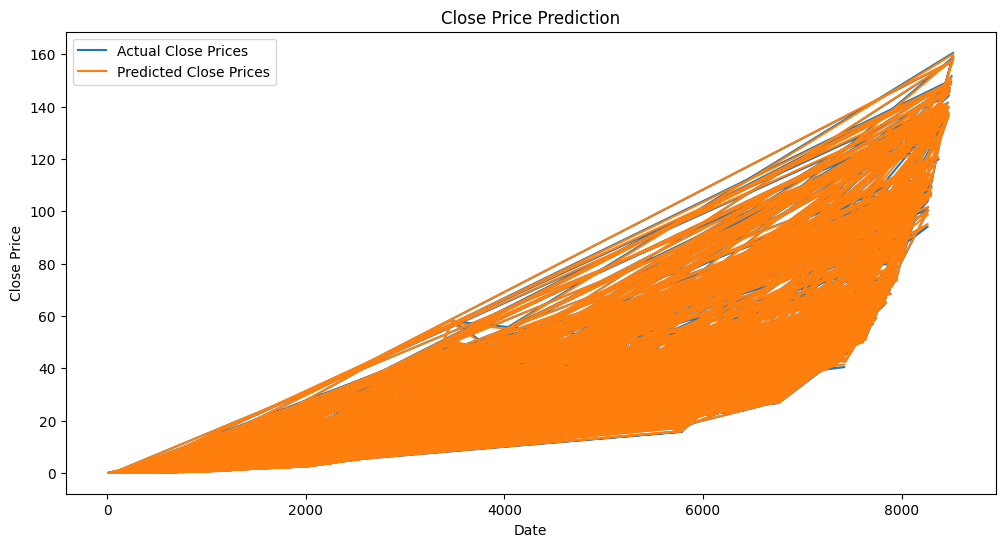

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv('MSFT.csv')

# Extract features and target variable
features = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
target = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


model = LinearRegression()

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Close Prices')
plt.plot(y_test.index, y_pred, label='Predicted Close Prices')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Prediction')
plt.show()



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


data = pd.read_csv('MSFT.csv')


features = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
target = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Random Forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.04266101126021738


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = pd.read_csv('MSFT.csv')

data['Close_Direction'] = (data['Close'] - data['Close'].shift(1)) > 0
features = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
target = data['Close_Direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Naive Bayes model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.4961876832844575


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

data = pd.read_csv('MSFT.csv')

features = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]

k=3
model = KMeans(n_clusters=k)

data['Cluster'] = model.fit_predict(features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv('MSFT.csv')

data['Close_Direction'] = (data['Close'] - data['Close'].shift(1)) > 0
features = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
target = data['Close_Direction']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

k=5
model = KNeighborsClassifier(n_neighbors=k)
# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model (classification)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.4879765395894428


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


data = pd.read_csv('MSFT.csv')

data['Close_Direction'] = (data['Close'] - data['Close'].shift(1)) > 0
features = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
target = data['Close_Direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6780058651026393


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


data = pd.read_csv('MSFT.csv')

data['Close_Direction'] = (data['Close'] - data['Close'].shift(1)) > 0
features = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
target = data['Close_Direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report_str)


Accuracy: 0.6780058651026393
Accuracy: 0.6780058651026393
Confusion Matrix:
 [[587 271]
 [278 569]]
Classification Report:
               precision    recall  f1-score   support

       False       0.68      0.68      0.68       858
        True       0.68      0.67      0.67       847

    accuracy                           0.68      1705
   macro avg       0.68      0.68      0.68      1705
weighted avg       0.68      0.68      0.68      1705



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = pd.read_csv('MSFT.csv')

data['Close_Direction'] = (data['Close'] - data['Close'].shift(1)) > 0
features = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
target = data['Close_Direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Naive Bayes model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report_str)


Accuracy: 0.4961876832844575
Accuracy: 0.4961876832844575
Confusion Matrix:
 [[123 735]
 [124 723]]
Classification Report:
               precision    recall  f1-score   support

       False       0.50      0.14      0.22       858
        True       0.50      0.85      0.63       847

    accuracy                           0.50      1705
   macro avg       0.50      0.50      0.42      1705
weighted avg       0.50      0.50      0.42      1705



In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd
from sklearn.cluster import KMeans

data = pd.read_csv('MSFT.csv')

features = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]

k=3
model = KMeans(n_clusters=k)

data['Cluster'] = model.fit_predict(features)

# Evaluate the K-Means model using the Silhouette Score
silhouette_avg = silhouette_score(features, data['Cluster'])
print("Silhouette Score:", silhouette_avg)

# Evaluate the K-Means model using the Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(features, data['Cluster'])
print("Davies-Bouldin Index:", davies_bouldin)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.5634720773397324
Davies-Bouldin Index: 0.5877131522978057


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv('MSFT.csv')

data['Close_Direction'] = (data['Close'] - data['Close'].shift(1)) > 0
features = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
target = data['Close_Direction']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

k=5
model = KNeighborsClassifier(n_neighbors=k)
# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model (classification)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Make predictions
y_pred = model.predict(X_test)

# Evaluate the k-NN model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report_str)


Accuracy: 0.4879765395894428
Accuracy: 0.4879765395894428
Confusion Matrix:
 [[407 451]
 [422 425]]
Classification Report:
               precision    recall  f1-score   support

       False       0.49      0.47      0.48       858
        True       0.49      0.50      0.49       847

    accuracy                           0.49      1705
   macro avg       0.49      0.49      0.49      1705
weighted avg       0.49      0.49      0.49      1705

